1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
#np.random.seed(12346)
import seaborn as sn

from scipy.stats import norm
from scipy.stats import linregress

Text(0, 0.5, 'f(x)')

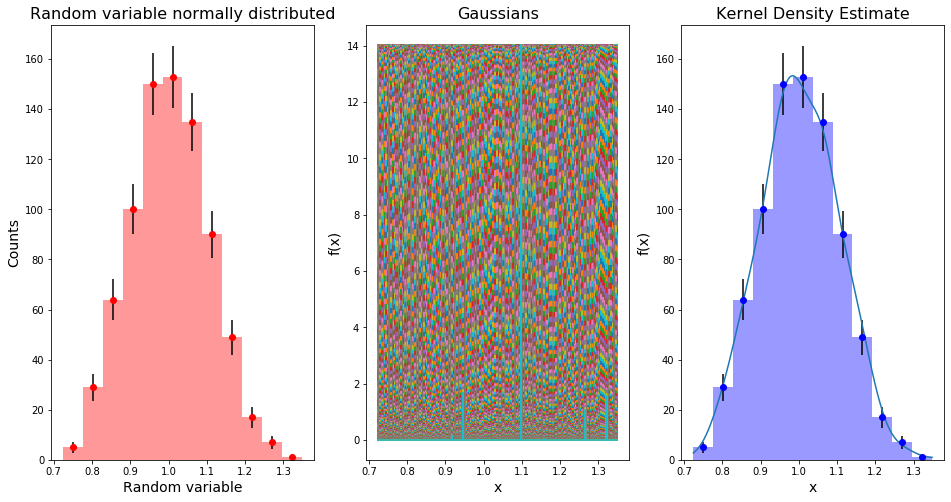

In [2]:
np.random.seed(1185237)

N=800
mean=1.0
std=0.1
x=np.random.normal(mean, std, N)
#print(len(x))
y,binEdges = np.histogram(x,bins=12)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
                               figsize=(16, 8))
hist, bins, patches=ax1.hist(x, bins=12, color='r', alpha=0.4)
ax1.errorbar(bincenters, y, yerr=menStd, fmt='o', color='r', ecolor='black')
ax1.set_ylabel("Counts", size=14)
ax1.set_xlabel("Random variable", size=14)
ax1.set_title("Random variable normally distributed",size=16)

#Gaussian for each x
std_2=1.06*x.std()*x.size**(-1/5)

gaussians_2=[]
points_2=np.linspace(x.min(), x.max(), N)

for xi in x:
    gaussians_2.append(norm.pdf(points_2, xi, std_2))
#print(gaussians)    
    
ax2.plot(points_2,gaussians_2)    
ax2.set_title("Gaussians",size=16)
ax2.set_xlabel("x", size=14)
ax2.set_ylabel("f(x)", size=14)


#Kernel Density Estimate
sum_gaussian=np.sum(gaussians_2, axis=0)
original_integral=np.sum(np.diff(bins)*hist)
norm = original_integral/sp.integrate.trapz(y=sum_gaussian, x=points_2)
norm_sum_gaussian=sum_gaussian*norm


ax3.plot(points_2, norm_sum_gaussian)
ax3.hist(x, bins=12, color='b', alpha=0.4)
ax3.errorbar(bincenters, y, yerr=menStd, fmt='o', color='b', ecolor='black')
ax3.set_title("Kernel Density Estimate",size=16)
ax3.set_xlabel("x", size=14)
ax3.set_ylabel("f(x)", size=14)



#### 2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [3]:
'''! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')'''


"! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png\nfrom IPython.display import Image\nImage('two_categories_scatter_plot.png')"

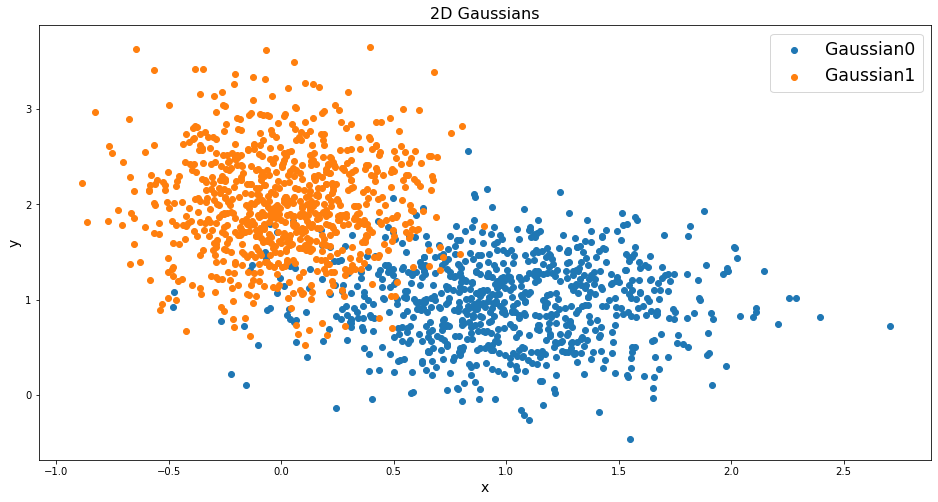

In [4]:
def Gaussian_2D(mean, std, N, n_cat): #means for each category have shape (2,), stds have shape (2,2))
    dataset=[]
    for i in range(n_cat):
        dataset_i=np.zeros((N,2))
        dataset_i=np.random.multivariate_normal(mean[i],std[i],N)
        dataset.append(dataset_i)
    return dataset    
    
#Two categories:
N=800
n_cat=2 #set 2 or 3 categories
means=[[1,1], [0,2], [3,4]]
stds=[[[0.2,0.0],[0.0,0.2]], [[0.1,0.0],[0.0,0.3]], [[0.1,0.0],[0.0,0.5]]]

Gaussian_2D(means, stds, N, n_cat)
dataset=Gaussian_2D(means, stds, N, n_cat)

fig, ax = plt.subplots(figsize=(16, 8))
for i in range(n_cat):
    ax.scatter(x=dataset[i][:,0], y=dataset[i][:,1], label="Gaussian"+str(i))
    ax.set_title("2D Gaussians",size=16)
    ax.set_xlabel("x", size=14)
    ax.set_ylabel("y", size=14)
    ax.legend(fontsize='xx-large')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

****Linear regression with scipy.stats.linregress()****
slope= 0.0032597701220305835
intercept= -0.15432816763069473
rvalue= 0.04340351052255908
pvalue= 8.717037183576464e-06
stderr= 0.0007327014008445791


****Linear regression with seaborn****


<ErrorbarContainer object of 3 artists>

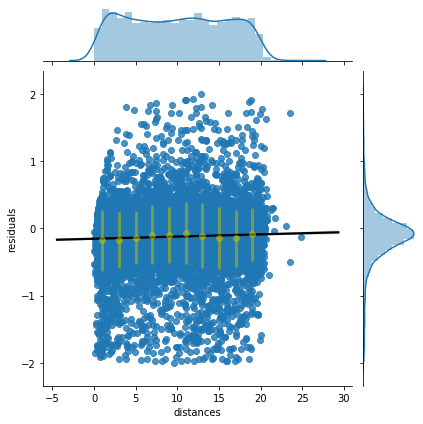

In [5]:
data=np.load("./residuals_261.npy", allow_pickle=True).item()
dataset=pd.DataFrame(data)
#filter dataset
dataset=dataset[abs(dataset["residuals"])<2]
dataset

y_axis=dataset["residuals"]
x_axis=dataset["distances"]
slope, intercept, r_value, p_value, std_err = linregress(x_axis,y_axis)

print("****Linear regression with scipy.stats.linregress()****")
print("slope=", slope)
print("intercept=", intercept)
print("rvalue=", r_value)
print("pvalue=", p_value)
print("stderr=", std_err)  

print("\n")
print("****Linear regression with seaborn****")
reg=sn.jointplot(x_axis, y_axis, data=dataset, kind='reg', joint_kws={'line_kws':{'color':'black'}})

hist, bins=np.histogram(x_axis, range=(0,20))
x=0.5*(bins[1:]+bins[:-1])
#print("x:",x)

y=[]
erry=[]
for i in range(0,(bins.size-1)):
    condition= (dataset["distances"]>bins[i]) & (dataset["distances"]<bins[i+1])
    residuals= dataset[condition]
    residuals=residuals["residuals"]
    y.append(residuals.mean(axis=0))
    erry.append(residuals.std())

#print(erry)    
    
plt.errorbar(x,y,erry, label='Mean of residuals with error bars',linewidth=3,fmt='yo', alpha=0.5)
                      
    